In [1]:


import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
from astropy.io import fits

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

from IPython.display import clear_output
import time



In [2]:
def fits_list(directory_name, file_name_keyword):                 #file_name_keyword (a string) is used to filter the kind of file being taken (here e.g. cbsimg_c2AA or cbsimg_c2BB)
    f_list = os.listdir(directory_name)
    count = len(f_list)
    hdul_list = []
    
    for i in range(0, count):
        if file_name_keyword in f_list[i]:
            hdul_list.append(fits.open(directory_name+f_list[i]))
        
    return hdul_list


In [5]:
Directory_1 = '/home/iiser/Desktop/AKD/CME_project/20081212_d4c2A/'

In [6]:
filea = fits_list(Directory_1, '_d4c2A')
na2 = len(filea)
print(na2)

48


In [7]:
#         filea[i].info() would give the table for a single FITS file for example - 

#        > filea[0].info()    #first file in the list 

#        Output>  

#        Filename: G:/NAXATRA/CME project/20081212_d4c2A/20081212_000754_d4c2A.fts
#        No.    Name      Ver    Type      Cards   Dimensions   Format
#          0  PRIMARY       1 PrimaryHDU     246   (2048, 2048)   int16 (rescales to uint16)   
#          1                1 TableHDU       104   3R x 24C   [F8.3, F10.6, I2, I2, F6.1, A1, A1, A1, A1, I5, I4, A1, A6, I4, I4, A23, A23, F9.6, F9.6, F9.6, F9.6, F9.5, F9.5, I7]


In [8]:
#        filea[i][0].data   will give the image for example - 

#        > filea[0][0].data   
#        > Output 

#        [[2058 2058 2058 ... 2058 2058 2058]
#         [2058 2058 2058 ... 2058 2058 2058]
#         [2058 2058 2058 ... 2058 2058 2058]
#         ...
#         [2054 2062 2062 ... 2058 2058 2058]
#         [2064 2054 2056 ... 2058 2058 2058]
#         [2050 2058 2058 ... 2058 2058 2058]]


In [9]:
# A function for plotting a graph for a FITS image

def plot_fits(fits_file):
    #print(fits_file.info())
    image_data = fits_file[0].data
    print(image_data)
    #plt.imshow(image_data)
    #plt.show
    #plt.colorbar()
    return 

plot_fits(filea[46])


[[2058 2058 2058 ... 2058 2058 2058]
 [2058 2058 2058 ... 2058 2058 2058]
 [2058 2058 2058 ... 2058 2058 2058]
 ...
 [2054 2062 2062 ... 2058 2058 2058]
 [2064 2054 2056 ... 2058 2058 2058]
 [2050 2058 2058 ... 2058 2058 2058]]


In [10]:
# A function to run images in series

def run_images(fits_list):
    for fits_file in fits_list:
        plot_fits(fits_file)
        time.sleep(0.5)
        clear_output(wait=True)
    return

run_images(filea)


[[2064 2062 2060 ... 2058 2058 2058]
 [2064 2062 2060 ... 2058 2058 2058]
 [2064 2062 2060 ... 2058 2058 2058]
 ...
 [2056 2056 2056 ... 2056 2056 2056]
 [2056 2056 2056 ... 2056 2056 2056]
 [2056 2056 2056 ... 2056 2056 2056]]


# GCS Python

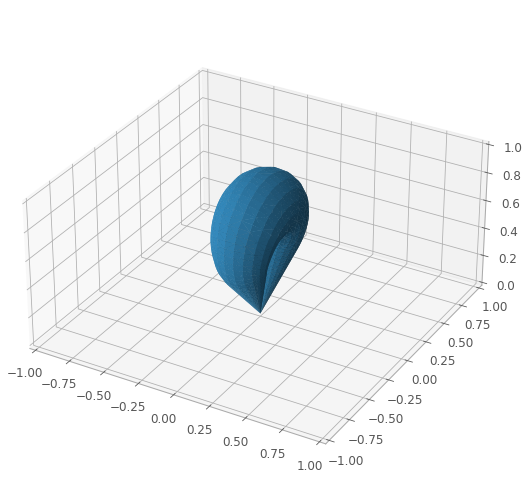

In [11]:
from gcs.geometry import gcs_mesh
import matplotlib.tri as mtri
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

plt.rcParams['figure.figsize'] = [9, 9]
fig = plt.figure()
ax = fig.add_subplot(111, projection=Axes3D.name)

mesh, u, v = gcs_mesh(np.radians(25), 1, 20, 20, 20, 0.3)
tri = mtri.Triangulation(u, v)

ax.plot_trisurf(*mesh.T, triangles=tri.triangles)
ax.set_xlim3d([-1, 1])
ax.set_ylim3d([-1, 1])
ax.set_zlim3d([0, 1])
ax.set_box_aspect([1, 1, 0.5])

plt.show()

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


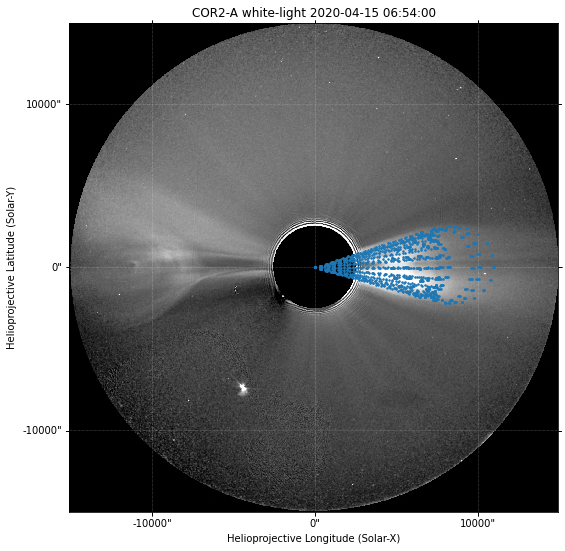

In [27]:


from sunpy.map import Map
from sunpy.net import helioviewer

from gcs.geometry import gcs_mesh_sunpy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# create GCS mesh
date = dt.datetime(2020, 4, 15, 6, 54)
half_angle = 25
height = 8.79
kappa = 0.26
lat = np.radians(-)
lon = np.radians(354)
tilt = np.radians(5)

mesh = gcs_mesh_sunpy(date, half_angle, height, 20, 20, 20, kappa, lat, lon, tilt) #(date, alpha, height, straight_vertices, front_vertices, circle_vertices, k, lat, lon, tilt)

# download STEREO-A COR2 image
hv = helioviewer.HelioviewerClient()
f = hv.download_jp2(date, observatory='STEREO_A', instrument='SECCHI', detector='COR2')
map = Map(f)

# plot image
plt.rcParams['figure.figsize'] = [9, 9]
fig = plt.figure()
ax = plt.subplot(projection=map)

map.plot(cmap='Greys_r')

# plot GCS mesh
ax.plot_coord(mesh, '.', ms=3)

plt.show()



# Testing GCS for L0 images

In [25]:
from sunpy.map import Map
from sunpy.net import helioviewer

from gcs.geometry import gcs_mesh_sunpy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# create GCS mesh
date = dt.datetime(2008, 12, 12, 0, 7)
half_angle = 50
height = 8.79
kappa = 0.26
lat = np.radians(-1)
lon = np.radians(0)
tilt = np.radians(5)

mesh = gcs_mesh_sunpy(date, half_angle, height, 20, 20, 20, kappa, lat, lon, tilt) #(date, alpha, height, straight_vertices, front_vertices, circle_vertices, k, lat, lon, tilt)



In [ ]:
f = '/home/iiser/Desktop/AKD/CME_project/20081212_d4c2A/20081212_000754_d4c2A.fts'
map = Map(f)


In [30]:
# plot image
plt.rcParams['figure.figsize'] = [9, 9]
fig = plt.figure()
ax = plt.subplot(projection=map)


map.plot(cmap='Greys_r')

# plot GCS mesh
ax.plot_coord(mesh, '.', ms=3)

plt.show()

Observatory,STEREO A
Instrument,SECCHI
Detector,COR2
Measurement,white-light
Wavelength,0.0
Observation Date,2008-12-12 00:07:30
Exposure Time,6.004554 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[14.7 14.7] arcsec / pix
Reference Pixel,[1016.8 1023.9] pix

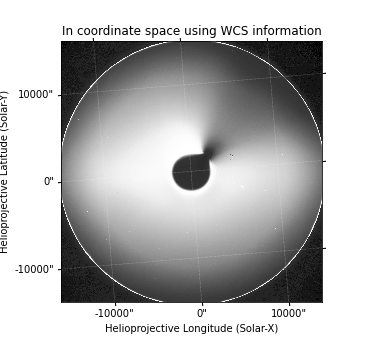
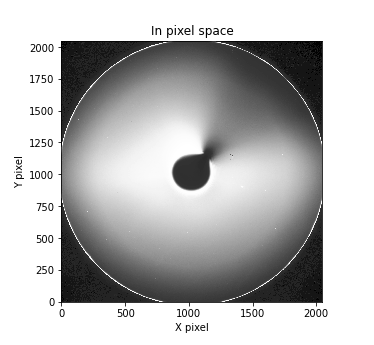
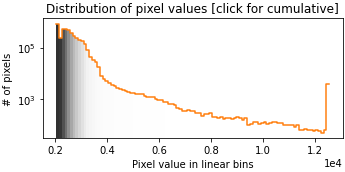
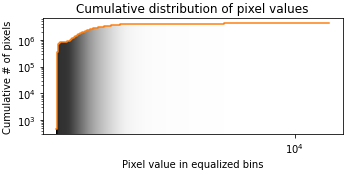

In [31]:
map

# Testing GCS for background corrected images

In [23]:
from sunpy.map import Map
from sunpy.net import helioviewer

from gcs.geometry import gcs_mesh_sunpy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# create GCS mesh
date = dt.datetime(2020, 4, 15, 6, 54)
half_angle = 25
height = 8.79
kappa = 0.26
lat = np.radians(-1)
lon = np.radians(354)
tilt = np.radians(5)

mesh = gcs_mesh_sunpy(date, half_angle, height, 20, 20, 20, kappa, lat, lon, tilt) #(date, alpha, height, straight_vertices, front_vertices, circle_vertices, k, lat, lon, tilt)


In [ ]:
f = '/home/iiser/Desktop/AKD/CME_project/data_process_results/20081212_003754_cbsimg_c2AA.fits'
map = Map(f)


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


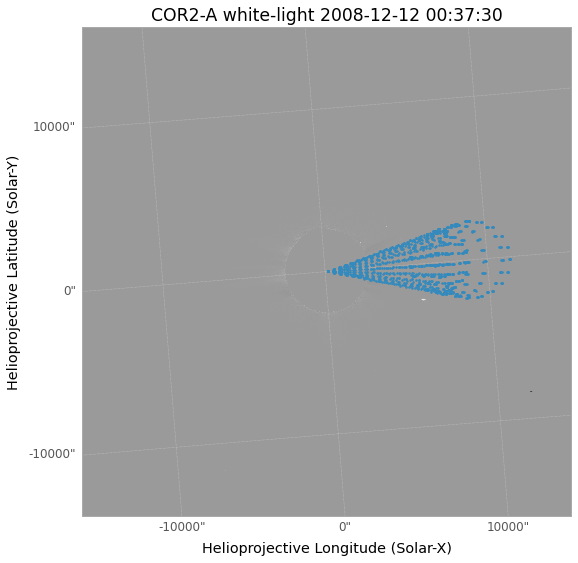

In [20]:
# plot image
plt.rcParams['figure.figsize'] = [9, 9]
fig = plt.figure()
ax = plt.subplot(projection=map)


map.plot(cmap='Greys_r')

# plot GCS mesh
ax.plot_coord(mesh, '.', ms=3)

plt.show()

# Binning

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
from astropy.io import fits

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

#from IPython.display import clear_output
#import time


In [22]:
def fits_list(directory_name, file_name_keyword):                 #file_name_keyword (a string) is used to filter the kind of file being taken (here e.g. cbsimg_c2AA or cbsimg_c2BB)
    f_list = os.listdir(directory_name)
    count = len(f_list)
    hdul_list = []
    
    for i in range(0, count):
        if file_name_keyword in f_list[i]:
            hdul_list.append(fits.open(directory_name+f_list[i]))
        
    return hdul_list


In [23]:
Directory_1 = '/home/iiser/Desktop/AKD/CME_project/data_process_results/'

In [24]:
filea = fits_list(Directory_1, '_c2AA')
na2 = len(filea)
print(na2)


47


In [25]:
unscaled = filea[0][0].data

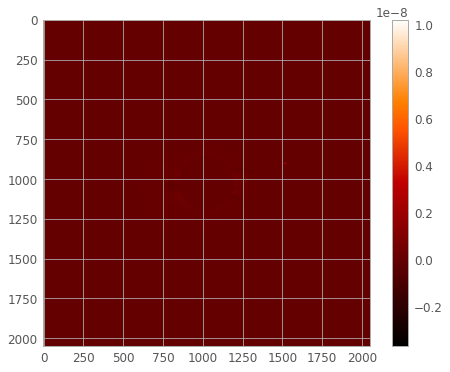

In [35]:
plt.imshow(unscaled)
plt.show
plt.colorbar()


In [13]:
print(np.max(unscaled),np.min(unscaled))

1.0190931e-08 -3.6605907e-09


In [14]:
#Binning the image

ul_lim_s = unscaled
u_lim = 1e-10
l_lim = 1e-12

for i in range (0,2048):
    for j in range (0,2048):
        if (ul_lim_s[i][j]>u_lim):
            ul_lim_s[i][j]=u_lim

for i in range (0,2048):
    for j in range (0,2048):
        if (ul_lim_s[i][j]<l_lim):
            ul_lim_s[i][j]=l_lim

In [15]:
np.max(ul_lim_s)

1e-10

In [16]:
np.min(ul_lim_s)

1e-12

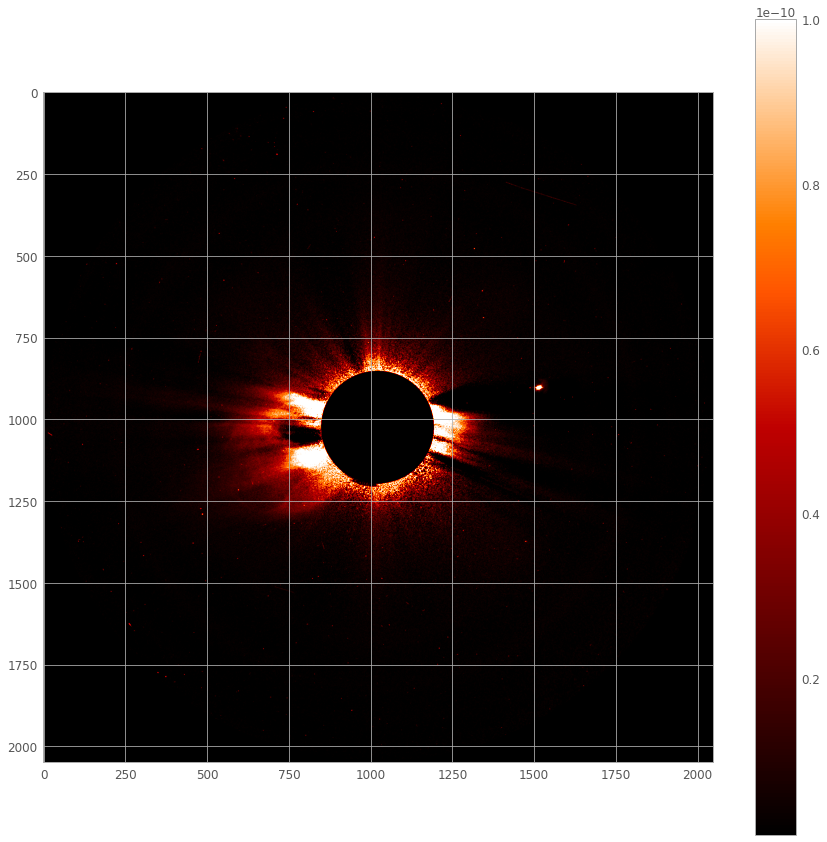

In [38]:
plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(ul_lim_s)


plt.show
plt.colorbar()

# Overplotting mesh on processed images

In [22]:
#Defining the mesh

from sunpy.map import Map
from sunpy.net import helioviewer

from gcs.geometry import gcs_mesh_sunpy
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt

# create GCS mesh
date = dt.datetime(2008, 12, 12, 0, 37)
half_angle = 65
height = 8.79
kappa = 0.26
lat = np.radians(0)
lon = np.radians(0)
tilt = np.radians(5)

mesh = gcs_mesh_sunpy(date, half_angle, height, 20, 20, 20, kappa, lat, lon, tilt) #(date, alpha, height, straight_vertices, front_vertices, circle_vertices, k, lat, lon, tilt)


In [24]:
#For image binning

import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
import os
from astropy.io import fits

from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

In [25]:
def fits_list(directory_name, file_name_keyword):                 #file_name_keyword (a string) is used to filter the kind of file being taken (here e.g. cbsimg_c2AA or cbsimg_c2BB)
    f_list = os.listdir(directory_name)
    count = len(f_list)
    hdul_list = []
    
    for i in range(0, count):
        if file_name_keyword in f_list[i]:
            hdul_list.append(fits.open(directory_name+f_list[i]))
        
    return hdul_list


In [26]:
#Set the name of directory and name the file

Directory_1 = '/home/iiser/Desktop/AKD/CME_project/data_process_results/'



In [ ]:
filea = fits_list(Directory_1, '_c2AA')
na2 = len(filea)
print('Total :', na2)

for i in range(0, na2):
    print(i, ' - ', filea[i].filename())


In [28]:
#Name the file from the directory

f = '/home/iiser/Desktop/AKD/CME_project/data_process_results/20081212_003754_cbsimg_c2AA.fits'
map = Map(f)


#Select the file from the directory --> filea[i][0]

unscaled = filea[41][0].data

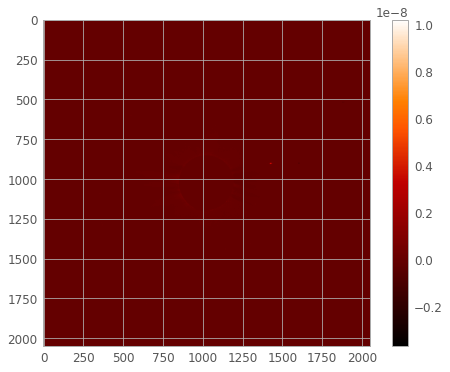

In [29]:
plt.imshow(unscaled)
plt.show
plt.colorbar()

In [30]:
print(np.max(unscaled),np.min(unscaled))

1.0190211e-08 -3.6631382e-09


In [31]:
#Binning the image

ul_lim_s = unscaled
u_lim = 1e-10
l_lim = 1e-12

for i in range (0,2048):
    for j in range (0,2048):
        if (ul_lim_s[i][j]>u_lim):
            ul_lim_s[i][j]=u_lim

for i in range (0,2048):
    for j in range (0,2048):
        if (ul_lim_s[i][j]<l_lim):
            ul_lim_s[i][j]=l_lim

In [32]:
print(np.max(ul_lim_s),np.min(ul_lim_s))

1e-10 1e-12


INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]
INFO: Missing metadata for solar radius: assuming the standard radius of the photosphere. [sunpy.map.mapbase]


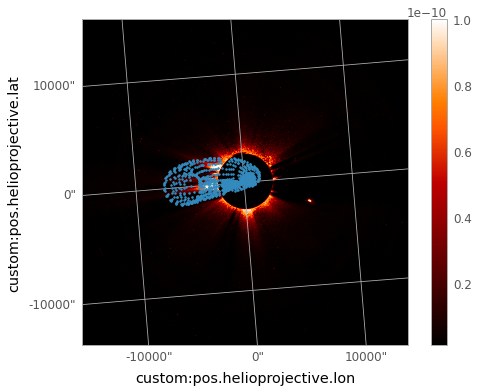

In [33]:
# plot GCS mesh
ax = plt.subplot(projection=map)
ax.plot_coord(mesh, '.', ms=3)
#map.plot(cmap='Greys_r')

#plt.rcParams['figure.figsize'] = [15, 15]
plt.imshow(ul_lim_s)


plt.show
plt.colorbar()